In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('train.csv')
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Column types  
* Numerical - PassengerID ,  Fare  ,Age
* Categorical - Survived ,Pclass , Sex , SibSp , Embarked , Parch  
* Mixed -  Name , ticket ,Cabin

Steps in EDA  
* first understand type of data - Int , Categorical ,Mixed  
* Univariate analysis  
* Bivariate  analysis   
* Multi and feature engineering  
* Outlier detection  


### Univariate Analysis  
* Distribution Analysis: To identify shape , central tendency and dispersion.  
    * Shape:  
        * Normal(symetrical)data is in middle ,where mean ,median and mode are same.  
        * Skewed: Not symmetric , one tail is longer than the other.  
        * Bimodal: Distribution with two peaks.
     * Central tendency:  
          * Mean .median and mode. 
    * Dispersion:  Its a statistical term used to descibe  the spread of data.  
         * range: diff btwn largest and smallest value in data set.  
         * Variance: Distance from the mean.
         * Deviation : Sqrt of  variance.
    
* Identifying potential issues : Outliers ,skewness and missing values.  

At first in univariater analysis we work on Integer.  
* descriptive statistics : We calc the mean ,median ,mode ,var,deviation and quartile. 
* visualization : histograms ,boxplots, density plots,kdeplots.  
* Identifying outliers : identifying using visualization, multiple reasons for outliers..  
   like data entry errroe , legit errors etc . 
* Skewness : We solve it using roboust statistical methods.  
   

The goal is to find if a passenger will survive or not.   
* Numerical - PassengerID ,  Fare  ,Age  
Here PassengerID makes no sense for predicting passenger survival.So we'll ignore it.  

#### Age

In [59]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

25% are below 20   
50% are below 28  
75% are below 38  

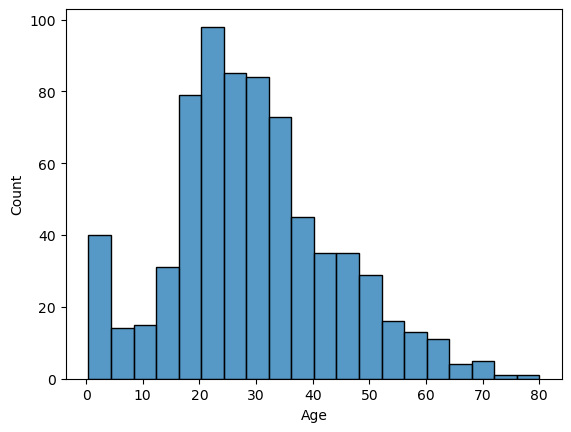

In [60]:
ax = sns.histplot(data = df['Age'],
                  bins = 20);

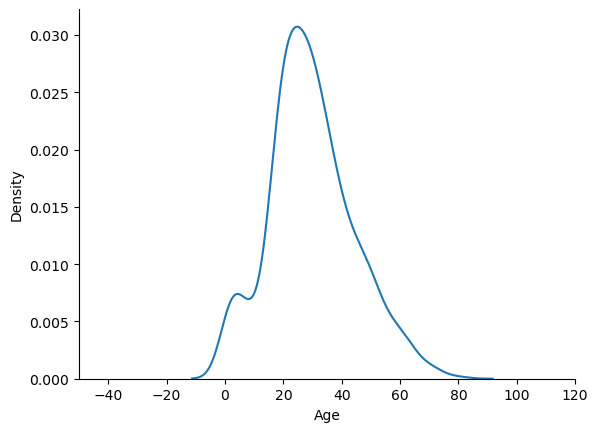

In [61]:
ax = sns.kdeplot(data = df['Age']);
ax.set_xlim(-50,120)
sns.despine()

Calculating skewness by using skew function ,is its away from 0 ,close to 1 then its  
positively skewed data. 

In [62]:
df['Age'].skew()

0.38910778230082704

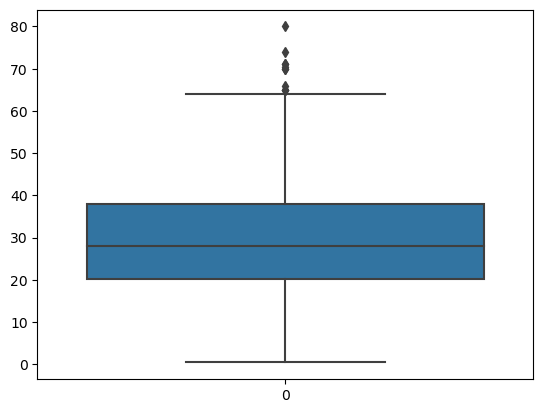

In [63]:
ax = sns.boxplot(data = df['Age']);

##### Boxplot Analysis  
so the middle blue part is called as median(IQR) ,lower part is q1 and upper part is q2.   
and anything   
below the min line(q1) that is q1 - 1.5 x IQR is an outlier.  
             above the max line(q2) that is q2 + 1.5 x IQR is an outlier.

So above 65 are consideredd as ourtliers.  
So lets check:-  

In [64]:
df[df['Age'] > 65] 
# it looks fine.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


Now lets see if any person's age is not mentioned.

In [65]:
df['Age'].isnull().sum()
# 177 missing age values

177

In [66]:
df['Age'].isnull().sum() / len(df['Age']) * 100 
#almsot 20% missing values

19.865319865319865

## Univariate Analysis on Fare column

In [67]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(0.0, 300.0)

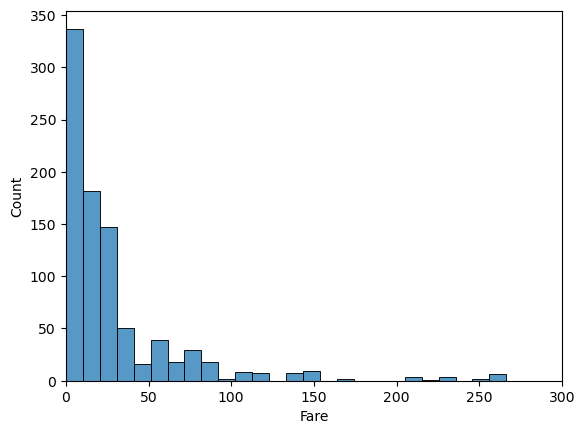

In [68]:
ax = sns.histplot(data = df['Fare'],bins = 50);
ax.set_xlim(0,300)

So a lot ofpeople are travelling by paying less than 50.  
We can understand more by plotting kdeplot. 

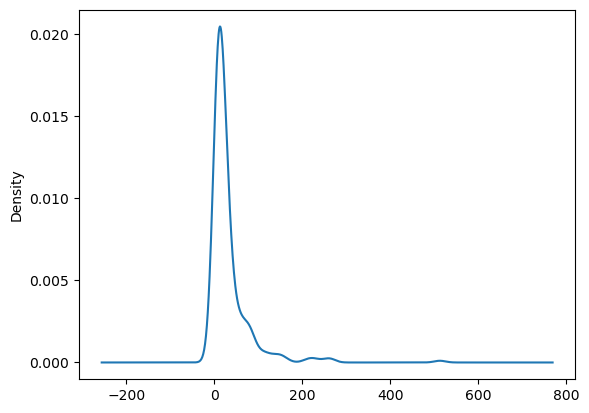

In [69]:
df['Fare'].plot(kind = 'kde');
# its skewed

In [70]:
df['Fare'].skew()

4.787316519674893

Highly skewed data

Now lets further understand by plotting a boxplot.  

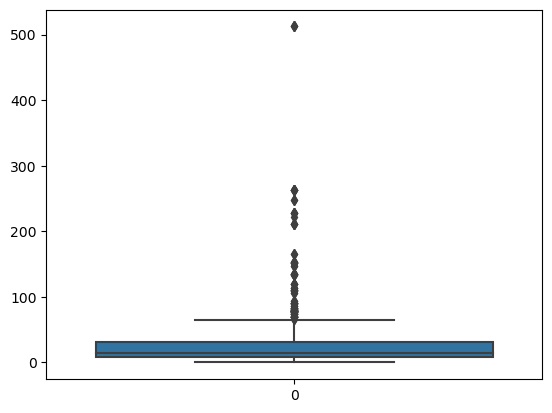

In [71]:
ax = sns.boxplot(data = df['Fare']);

Clearly ther are a lot of outliers. 
max = 100  


In [72]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


Ok So 263  is the sum of tickets of everyone present in the family.   
so its group fare and not individual fare.  
Maybe ,later we might need to find fare of individuals.  

### Univariate Analysis on Categorical coolumns

* Frequency distribution.  
* Visualization: Countplot , piechart

In [75]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

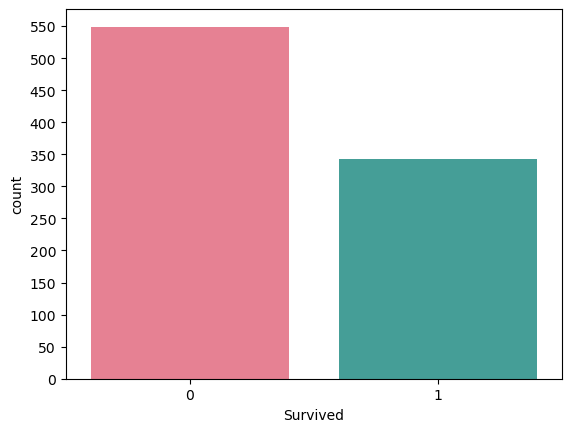

In [89]:
ax = sns.countplot(data = df,
                   x = df['Survived'],
                  palette = 'husl');

#ax.set_ylim([0,600]);
ax.set_yticks(range(0,600,50));

to find the number of deaths we can use piechart

Text(0.5, 1.0, 'Survival Distribution')

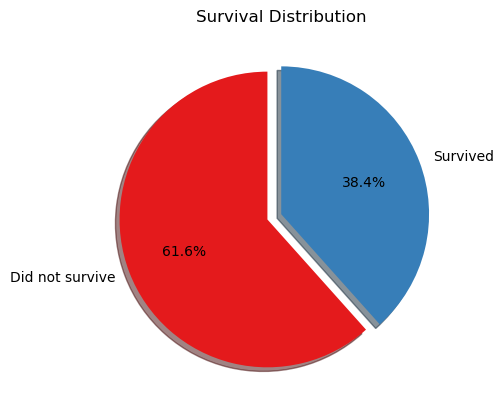

In [102]:
counts = df['Survived'].value_counts()
explode = (0.1,0)
plt.pie(counts, labels=['Did not survive', 'Survived'],
        autopct='%0.1f%%',
        shadow=True, 
        startangle=90,
        explode = explode ,
        colors  = sns.color_palette('Set1'));
plt.title('Survival Distribution')
